## Seasonal Cash Price Feeder Cattle

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
cash_price_feeder = pd.read_csv('../csv/cash_price_feeder.csv')

cash_price_feeder = src.usda_clean_monthly(cash_price_feeder, historical=True)

cash_price_feeder_pct_chg = cash_price_feeder.pct_change()*100
cash_price_feeder_pct_chg.name = 'cash_price_feeder_pct_chg'
cash_price_feeder_pct_chg = cash_price_feeder_pct_chg.dropna()

cash_price_feeder_adj = src.adjust_series_cpi(cash_price_feeder)
cash_price_feeder_adj.name = 'cash_price_feeder_adj'

In [4]:
df_adj = pd.DataFrame({
    'cash_price_feeder_adj':cash_price_feeder_adj,
    'month' : cash_price_feeder_adj.index.month,
    'quarter' : cash_price_feeder_adj.index.quarter,
})

import plotly.subplots as sp

fig = sp.make_subplots(rows=1, cols=1)

fig.add_box(y=df_adj['cash_price_feeder_adj'], x=df_adj['month'], name='Price Received')

fig.update_layout(title='Price Received for Feeder Cattle by Month (Adj. CPI)',
                  xaxis_title='Month',
                  yaxis_title='Adjusted Price Received')

fig.show()

Text(0.5, 1.0, 'Mean Price Received Feeder Cattle by Month $/cwt (Adj. CPI)')

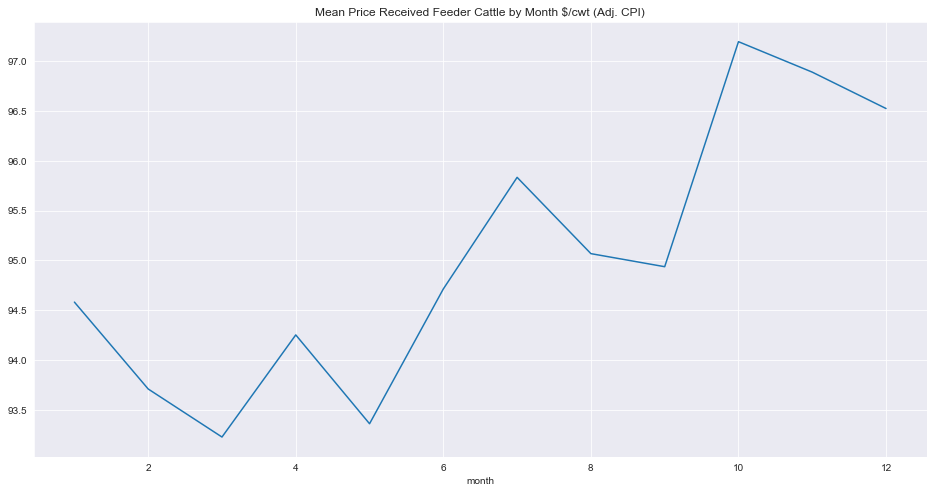

In [5]:
df_adj.groupby('month')['cash_price_feeder_adj'].mean().plot()
plt.title('Mean Price Received Feeder Cattle by Month $/cwt (Adj. CPI)')

Text(0.5, 1.0, 'Mean Price Received for GE 500 National Futures by Month $/cwt (Adj. CPI)')

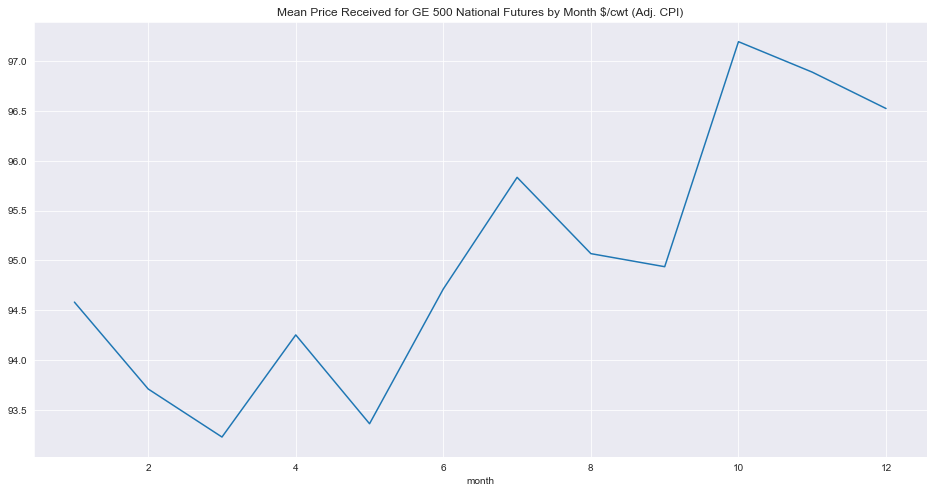

In [6]:
df_adj.groupby('month')['cash_price_feeder_adj'].mean().plot()
plt.title('Mean Price Received for GE 500 National Futures by Month $/cwt (Adj. CPI)')

- Cash price is higher throughout the first half of the year (max in May) and lower during second half of the year (min in October)
- Price variance also higher during first half of the year